In [ ]:
import torch
tensor_A = torch.tensor([[1,2], [3,4], [5,6]], dtype=torch.float32)
#tensor_B = torch.tensor([[7,10],[8,11],[9,12]], dtype=torch.float32)

torch.manual_seed(42)
linear = torch.nn.Linear(in_features=2, out_features=6)
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


In [21]:
x = torch.arange(0,100,10)
print(x)
print(x.dtype)

print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
print(f"Mean: {x.type(torch.float32).mean()}") # float datatype이 아니면 작동하지 않음  # x.mean() <- error
print(f"Sum: {x.sum()}\n")

print(torch.max(x))
print(torch.min(x))
print(torch.mean(x.type(torch.float32)))
print(torch.sum(x))

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
torch.int64
Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450

tensor(90)
tensor(0)
tensor(45.)
tensor(450)


In [23]:
# torch.argmax(), torch.argmin() <- 각각 최대값, 최소값의 인덱스를 반환  (softmax activation function(활성화함수)을 사용할 때 유용함)
tensor = torch.arange(10,100,10)
print(f"Tensor: {tensor}")
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


In [26]:
# torch.Tensor.type(dtype=None)을 사용하면 텐서의 자료형 변경 가능, dtype 매개변수는 사용자가 원하는 자료형을 지정
# 텐서를 생성했을 때 기본 데이터타입은 torch.float32
tensor = torch.arange(10.,100.,10.)
print(tensor.dtype)

tensor_float16 = tensor.type(torch.float16)
print(tensor_float16)

tensor_int8 = tensor_float16.type(torch.int8)
print(tensor_int8)

torch.float32
tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)
tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)


In [ ]:
# 실제 값을 바꾸지 않으면서 텐서들의 차원을 바꾸고자 할 때 (change or reshape)
# reshaping, stacking, squeezing and unsqueezing
# torch.reshape(input, shape)  #input을 원하는 형태(shape)으로 재배열
# Tensor.view(shape)  # 기존 텐서의 데이터를 유지하면서 다른 모양의 뷰를 반환   # 다른 모양의 뷰 : 기존 텐서의 메모리를 그대로 사용하면서 shape만 바꾼 텐서
# torch.stack(tensors, dim=0)  # 같은 크기의 텐서들을 새로운 차원으로 쌓음
# torch.squeeze(input)  # 텐서의 모든 크기 1인 차원을 제거
# torch.unsqueeze(input, dim)  # 지정한 위치 dim에 크기 1인 새로운 차원을 추가
# torch.permute(input, dims)  # 텐서의 차원 순서를 바꿈(재배열)

# torch.unsqueeze()
x = torch.tensor([1, 2, 3])  # shape: (3,)
print(x.shape)
print(x,"\n")

unsqueezed = torch.unsqueeze(x, 0)  # 0번 차원에 1 추가 → (1, 3)
print(unsqueezed.shape) 
print(unsqueezed,"\n")

unsqueezed = torch.unsqueeze(unsqueezed, 1)  # 1번 차원에 1 추가 → (3, 1)
print(unsqueezed.shape)
print(unsqueezed)

# torch.permute()
x = torch.randn(2, 3, 4)  # shape: (2, 3, 4)
print(x)
print(x.shape)

permuted = torch.permute(x, (1, 0, 2))  # → (3, 2, 4)
print(permuted)
print(permuted.shape)

torch.Size([3])
tensor([1, 2, 3]) 

torch.Size([1, 3])
tensor([[1, 2, 3]]) 

torch.Size([1, 1, 3])
tensor([[[1, 2, 3]]])


In [60]:
import torch
x = torch.arange(1.,8.)
print(x)
print(x.shape)



tensor([1., 2., 3., 4., 5., 6., 7.])
torch.Size([7])


In [61]:
x_reshaped = x.reshape(1,7)
print(x_reshaped, x_reshaped.shape)

tensor([[1., 2., 3., 4., 5., 6., 7.]]) torch.Size([1, 7])


In [ ]:
z = x.view(1,7) # 다른 모양의 뷰 : 기존 텐서의 메모리를 그대로 사용하면서 shape만 바꾼 텐서
print(z, z.shape)

tensor([[1., 2., 3., 4., 5., 6., 7.]]) torch.Size([1, 7])


In [ ]:
z[:,0]=5  # 기존 텐서의 메모리를 그대로 사용하기 때문에 z를 빠구면 x(original)도 바뀜
print(z,x)

tensor([[5., 2., 3., 4., 5., 6., 7.]]) tensor([5., 2., 3., 4., 5., 6., 7.])


In [ ]:
print(x)
print(x.shape,"\n")

x_stacked = torch.stack([x,x,x,x], dim=0) #dim은 새로운 차원을 어느 인덱스에 넣을지
print(x_stacked)
print(x_stacked.shape,"\n")

x_stacked = torch.stack([x,x,x,x], dim=1)
print(x_stacked)
print(x_stacked.shape)


tensor([5., 2., 3., 4., 5., 6., 7.])
torch.Size([7]) 

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])
torch.Size([4, 7]) 

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.]])
torch.Size([7, 4])


In [81]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# x_reshaped에서 추가 차원(extra demension) 제거
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


In [82]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

# 추가 차원(extra dimension) 추가
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


In [84]:
# torch.permute()를 사용하면 axes(축)의 순서를 바꿀 수 있음, 이 함수는 input텐서를 새로운 축 순서를 갖는 뷰(view)로 변환
x_original = torch.rand(size=(224,224,3))

x_permuted = x_original.permute(2,0,1)

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [95]:
# indexing (selecting data from tensors), 텐서로부터 특정 데이터만 선택하기를 원할 때
import torch
x= torch.arange(1,10).reshape(1,3,3)
print(x, x.shape,"\n")

print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}\n")

# 콜론(:)을 사용하면 해당 차원의 모든 값을 지정할 수 있고, 그 뒤에 쉼표를 사용해서 다른 차원의 값을 추가로 지정 가능
print(x[:,0])
print(x[:,:,1])
print(x[:,1,1])
print(x[0,0,:])

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]]) torch.Size([1, 3, 3]) 

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1

tensor([[1, 2, 3]])
tensor([[2, 5, 8]])
tensor([5])
tensor([1, 2, 3])


In [109]:
#PyTorch tensors & Numpy
# torch.from_numpy(ndarray) - Numpy array -> Pytorch tensor
# torch.Tensor.numpy()- Pytorch tensor -> Numpy array
import torch
import numpy as np
array = np.arange(1.0,8.0)  
tensor = torch.from_numpy(array) 
print(array)
print(tensor)
# numpy arrays는 default로 데이터타입이 float64임, pytorch tensor로 바꿔도 데이터 타입이 동일하게 유지됨  
# pytorch 계산은 default로 flaot32를 사용함
# Numpy array -> pytorch tensor(float32) : torch.from_numpy(array).type(torch.float32)

[1. 2. 3. 4. 5. 6. 7.]
tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64)


In [112]:
array = array + 1
#tensor = tensor +1
print(array)
print(tensor)

[2. 3. 4. 5. 6. 7. 8.]
tensor([1., 1., 1., 1., 1., 1., 1.])


In [113]:
# Tensor to Numpy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
print(tensor)
print(numpy_tensor, numpy_tensor.dtype, "\n")

tensor = tensor+1
print(tensor)
print(numpy_tensor)

tensor([1., 1., 1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1. 1. 1.] float32 

tensor([2., 2., 2., 2., 2., 2., 2.])
[1. 1. 1. 1. 1. 1. 1.]


재현 가능성 Reproducibility (무작위에서 무작위성을 제거하려는 시도)
신경망은 처음에 랜덤한 숫자들로 시작해서, 데이터의 패턴을 설명함
처음의 랜덤 숫자들은 패턴을 잘 설명하지 못함, 그래서 모델은 텐서 연산을 통해 숫자들을 계속 조정하면서 더 나은 패턴 표현으로 발전시켜 가는 과정을 거침
무작위성이 줄어들어야 하는 이유: 실험을 반복해서 검증할 수 있어야 하기 때문 (같은 코드를 서로 다른 사람이 각자의 컴퓨터에서 실행해도 거의 같은 결과를 얻을 수 있어야 함) 

In [ ]:
import torch
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(f"Tensor A:\n{random_tensor_A}\n")

print(f"Tensor B:\n{random_tensor_B}\n")

print(f"Does Tensor A equal Tensor B? (anywhere)")
print(random_tensor_A == random_tensor_B,"\n")

# 텐서A와 텐서B를 같은 값을 가진 두개의 무작위 텐서로 만들고자 할 때 사용하는 것이 torch.manual_seed(seed)
import torch
import random

RANDOM_SEED = 43  # seed에 따라 random으로 나오는 숫자가 달라짐
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3,4)
torch.random.manual_seed(seed=RANDOM_SEED)  # rand가 호출 될 때마다 seed를 초기화해주지 않으면 값이 다르게 나옴
random_tensor_D = torch.rand(3,4) 

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
print(random_tensor_C == random_tensor_D)

Tensor A:
tensor([[0.5191, 0.5335, 0.5375, 0.7058],
        [0.4275, 0.2761, 0.8396, 0.1563],
        [0.1072, 0.7261, 0.3241, 0.8892]])

Tensor B:
tensor([[0.1318, 0.8375, 0.5625, 0.4138],
        [0.8621, 0.2793, 0.5834, 0.3287],
        [0.6773, 0.7046, 0.9207, 0.2337]])

Does Tensor A equal Tensor B? (anywhere)
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]]) 

Tensor C:
tensor([[0.4540, 0.1965, 0.9210, 0.3462],
        [0.1481, 0.0858, 0.5909, 0.0659],
        [0.7476, 0.6253, 0.9392, 0.1338]])

Tensor D:
tensor([[0.4540, 0.1965, 0.9210, 0.3462],
        [0.1481, 0.0858, 0.5909, 0.0659],
        [0.7476, 0.6253, 0.9392, 0.1338]])

Does Tensor C equal Tensor D? (anywhere)
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


In [135]:
# GPU에서 텐서 실행
# Nvidia GPU에 접근 가능한지 확인 : !nvidia-smi  # !(bang)는 이 명령어를 명령어 줄(command line)에서 실행하라는 의미
!nvidia-smi

Wed Jun 25 18:23:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 571.59                 Driver Version: 571.59         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A4000             WDDM  |   00000000:17:00.0  On |                  Off |
| 41%   38C    P8             13W /  140W |     998MiB /  16376MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [136]:
# torch.cuda.is_available()을 사용하여 Pytorch가 GPU에 접근할 수 있는지 알 수 있음
print(torch.cuda.is_available())

True


In [148]:
# set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
# PyTorch에서는 장치에 구애받지 않는 코드(device agnostic code)를 작성하는 것이 best practice임
# 장치에 구애받지 않는 코드란 항상 존재하는 cpu에서도 실행되고, 가능한 경우 GPU에서도 실행될 수 있도록 작성하라는 의미
# 더 빠른 computing을 원한다면 여러개의 GPU를 사용할 수 있음, PyTorch가 접근할 수 있는 GPU의 개수는 torch.cuda.device_count()를 사용하여 확인 가능
print(torch.cuda.device_count())

# apple의 M1/M2/M3 GPU에서 pytorch를 실행하려면 torch.backends.mps 모듈을 사용
print(torch.backends.mps.is_available())
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(device)

if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print(device)

# putting tensors(and models) on the GPU, to(device)
#some_tensor.to(device) -> tensor의 copy를 반환함, 즉 같은 tensor가 CPU와 GPU에 존재함, 덮어쓰기 위해서는 재할당(reassign)해야함 -> some_tensor = some_tensor.to(device)
tensor = torch.tensor([1,2,3])  # create tensor (default on CPU)
print(tensor, tensor.device) # tensor not on GPU
tensor_on_gpu = tensor.to(device) # move tensor to GPU
print(tensor_on_gpu)  # 결과로 tensor([1, 2, 3], device='cuda:0')가 출력되는데 여기서 device='cuda:0'은 사용 가능한 첫 번째 GPU에 저장되어 있다는 의미

cuda
1
False
cpu
cuda
tensor([1, 2, 3]) cpu
tensor([1, 2, 3], device='cuda:0')


In [151]:
# moving tensors back to the cpu (for example tensors를 numpy와 함께 활용하고자 하는 경우 / numpy는 GPU를 활용하지 않음(not leverage))
#tensor_on_gpu.numpy() # error, GPU에 있기 때문에 numpy로 변환하지 못함
# Tensor.cpu() # (GPU에 있는)텐서를 CPU 메모리에 복사함
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
print(tensor_back_on_cpu)  
# 위 코드는 GPU텐서의 복사본을 CPU메모리에 반환하므로, original tensor는 GPU에 남아있음
print(tensor_on_gpu)

[1 2 3]
tensor([1, 2, 3], device='cuda:0')


In [180]:
#2. Create a random tensor with shape (7, 7).
import torch
a = torch.rand(size=(7,7))

#3. Perform a matrix multiplication on the tensor from 2 with another random tensor with shape (1, 7) (hint: you may have to transpose the second tensor).
b = torch.rand(size=(1,7))
print(torch.mm(a,b.T))


tensor([[3.4975],
        [2.8627],
        [2.5178],
        [1.8081],
        [2.6717],
        [2.1668],
        [3.7304]])


In [181]:
#4. Set the random seed to 0 and do 2 & 3 over again.
torch.manual_seed(seed=0)
print(torch.mm(a,b.T))

tensor([[3.4975],
        [2.8627],
        [2.5178],
        [1.8081],
        [2.6717],
        [2.1668],
        [3.7304]])


In [198]:
#5. Speaking of random seeds, we saw how to set it with torch.manual_seed() but is there a GPU equivalent? 
# (hint: you'll need to look into the documentation for torch.cuda for this one)
#If there is, set the GPU random seed to 1234.
torch.cuda.manual_seed(1234)

# 6. Create two random tensors of shape (2, 3) and send them both to the GPU (you'll need access to a GPU for this). 
# Set torch.manual_seed(1234) when creating the tensors (this doesn't have to be the GPU random seed).
device = "cuda"
torch.manual_seed(1234)
a=torch.rand(size=(2,3)).to(device)
b=torch.rand(size=(2,3)).to(device)
print(a)
print(b)

# 7. Perform a matrix multiplication on the tensors you created in 6 (again, you may have to adjust the shapes of one of the tensors).
mm6 = torch.mm(a,b.T)
print(mm6)

# 8. Find the maximum and minimum values of the output of 7.
print(mm6.max())
print(mm6.min())

# 9. Find the maximum and minimum index values of the output of 7.
print(mm6.argmax())
print(mm6.argmin())

tensor([[0.0290, 0.4019, 0.2598],
        [0.3666, 0.0583, 0.7006]], device='cuda:0')
tensor([[0.0518, 0.4681, 0.6738],
        [0.3315, 0.7837, 0.5631]], device='cuda:0')
tensor([[0.3647, 0.4709],
        [0.5184, 0.5617]], device='cuda:0')
tensor(0.5617, device='cuda:0')
tensor(0.3647, device='cuda:0')
tensor(3, device='cuda:0')
tensor(0, device='cuda:0')


In [199]:
# 10. Make a random tensor with shape (1, 1, 1, 10) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (10). 
# Set the seed to 7 when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.
torch.manual_seed(seed=7)
tensor = torch.rand(size=(1,1,1,10))
squeezedTensor = tensor.squeeze()
print(tensor)
print(tensor.shape)
print(squeezedTensor)
print(squeezedTensor.shape)

tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]])
torch.Size([1, 1, 1, 10])
tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513])
torch.Size([10])


In [202]:
# PyTorch Workflow Fundamentals (파이토치 워크플로 기본사항)
# 1. 데이터 준비 
# 2. 모델 구축 : 데이터의 패턴을 학습하는 모델 제작, 손실함수와 optimizer를 선택, 학습루프 구축
# 3. fitting the model to data(training) : model try to find patterns in the training data
# 4. making predictions and evaluating a model(추론) : compare with testing data
# 5. Saving and loading a model
# 6. Putting it all together(취합하기)
what_were_covering = {1: "data (prepare and load)",
2: "build model",
3: "fitting the model to data(training)",
4: "making predictions and evaluating a model(inference)",
5: "saving and loading a model",
6: "putting it all together"}

# torch.nn - nn은 neural network의 약자이며, 이 패키지는 PyTorch에서 신경망을 만들기 위한 기본 구성 요소들을 포함하고 있음
import torch
from torch import nn
import matplotlib.pyplot as plt
print(torch.__version__) #check PyTorch version

2.7.1+cu126


In [ ]:
# linear regression (선형회귀)
# gradient descent (경사하강법)
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)  # features
y = weight*X +bias  # labels

print(X[:10])
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


40 40 10 10


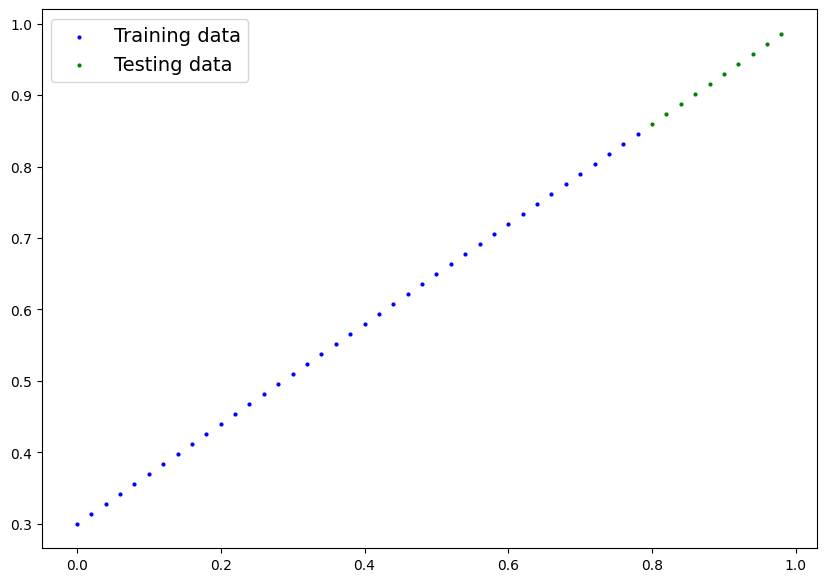

In [229]:
# Split data into training and test sets
# Training set
# Testing set
# Validation set (often but not always) (검증 데이터셋, 모델이 이 데이터에 의해 조정됨(model gets tuned on this data))
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(len(X_train), len(y_train), len(X_test),len(y_test))

def plot_predictions(train_data = X_train,
train_labels = y_train,
test_data=X_test,
test_labels=y_test,
predictions=None): # predictions 값을 주지 않아도 에러가 나지 않도록 하기 위함(예측 결과가 아직 없다면 predictions 인자를 생략 가능)
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10,7))

#Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data") # c는 컬러, s는 사이즈
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions") # 예측 값이 있으면 예측 결과를 빨간색으로 시각화

    plt.legend(prop={"size":14})

plot_predictions()